In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale,minmax_scale,robust_scale
import statsmodels.formula.api as smf
from statsmodels.api import Logit
from scipy import stats
from statsmodels.api import qqplot,add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR

plt.rcParams['axes.unicode_minus']=False

# import 프로펫
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

%matplotlib inline
matplotlib.rc('font',family='NanumGothic')

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# 데이터 시각화 추세 패키지
import seaborn as sns

!pip3 install mlxtend
# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
# 데이터 시각화 추세 패키지
import seaborn as sns
# 한글 패치
matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
#예측/회귀 Decision tree
from sklearn.tree import DecisionTreeRegressor
# 예측 / 회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
#예측/회귀 GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# 최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# os 환경
import os

from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true - y_pred))
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

# jupyter notebook 사용 시 그래프 자동 출력 옵션
%matplotlib inline
# 한글 패치
matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
product1 = pd.read_csv('file:///home/piai/바탕화면/파일/jeju_off_2018.csv', encoding='cp949')
product1

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt,year,month,season
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000,2018,1,겨울
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900,2018,1,겨울
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600,2018,1,겨울
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400,2018,10,가을
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000,2018,10,가을
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139954,C646145,C646145_20181228_124,서귀포매장,2018M12,금요일,17,2018-12-28,:0:17:52:00,2018-12-28,P05013500,채소,잎채소,상추,★상추(200g),1,1550,1550,2018,12,겨울
139955,C646145,C646145_20181228_124,서귀포매장,2018M12,금요일,17,2018-12-28,:0:17:52:00,2018-12-28,P10020100,반찬,두부/유부,두부,연두부(300g),1,1100,1100,2018,12,겨울
139956,C646145,C646145_20181228_124,서귀포매장,2018M12,금요일,17,2018-12-28,:0:17:52:00,2018-12-28,P08040109,간식,빵,빵,★카스텔라(소:100g)/매장,1,1300,1300,2018,12,겨울
139957,C646145,C646145_20181228_124,서귀포매장,2018M12,금요일,17,2018-12-28,:0:17:52:00,2018-12-28,P08010110,간식,과자,스낵,도깨비방망이과자(80g),1,2200,2200,2018,12,겨울


In [5]:
product2 = pd.read_csv('file:///home/piai/바탕화면/파일/jeju_off_2019.csv', encoding='cp949')
product2

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt,year,month,season
0,C118291,C118291_20190128_57,제주매장,2019M01,월요일,14,2019-01-28,:0:14:58:42,2019-01-28,P05070600,채소,버섯,팽이버섯,★팽이버섯(150g),1,600,600,2019,1,겨울
1,C118291,C118291_20190128_57,제주매장,2019M01,월요일,14,2019-01-28,:0:14:58:42,2019-01-28,P08010118,간식,과자,스낵,누룽지(500g),1,6600,6600,2019,1,겨울
2,C118291,C118291_20190128_57,제주매장,2019M01,월요일,14,2019-01-28,:0:14:58:42,2019-01-28,P06010402,축산물,한우,유기한우,곱게다진한우순살(유기/200g/국내산),1,13900,13900,2019,1,겨울
3,C118291,C118291_20190128_57,제주매장,2019M01,월요일,14,2019-01-28,:0:14:58:42,2019-01-28,P05071200,채소,버섯,목이버섯,목이버섯(200g),1,3300,3300,2019,1,겨울
4,C118291,C118291_20190128_57,제주매장,2019M01,월요일,14,2019-01-28,:0:14:58:42,2019-01-28,P10010100,반찬,김치,배추,★백김치(2kg),1,10900,10900,2019,1,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107880,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,:0:14:52:43,2019-12-22,P01010104,주곡,멥쌀,백미,백미/유(4kg)-매장용,1,15700,15700,2019,12,겨울
107881,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,:0:14:52:43,2019-12-22,P08010301,간식,과자,한과/유과,차례상약과(350g/10개),1,8800,8800,2019,12,겨울
107882,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,:0:14:52:43,2019-12-22,P06040300,축산물,유제품,아이스크림,유기농아이스크림(기본형),1,8900,8900,2019,12,겨울
107883,C705016,C705016_20191229_51,서귀포매장,2019M12,일요일,14,2019-12-29,:0:14:53:30,2019-12-29,P08040137,간식,빵,빵,쌀로만든잉글리쉬머핀(66g×4개)/매장,1,3900,3900,2019,12,겨울


In [6]:
# 2018, 2019 오프라인 매출 자료 합치기
product = pd.merge(product1, product2, how = 'outer')
product

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt,year,month,season
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000,2018,1,겨울
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900,2018,1,겨울
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600,2018,1,겨울
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400,2018,10,가을
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000,2018,10,가을
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247839,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,:0:14:52:43,2019-12-22,P01010104,주곡,멥쌀,백미,백미/유(4kg)-매장용,1,15700,15700,2019,12,겨울
247840,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,:0:14:52:43,2019-12-22,P08010301,간식,과자,한과/유과,차례상약과(350g/10개),1,8800,8800,2019,12,겨울
247841,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,:0:14:52:43,2019-12-22,P06040300,축산물,유제품,아이스크림,유기농아이스크림(기본형),1,8900,8900,2019,12,겨울
247842,C705016,C705016_20191229_51,서귀포매장,2019M12,일요일,14,2019-12-29,:0:14:53:30,2019-12-29,P08040137,간식,빵,빵,쌀로만든잉글리쉬머핀(66g×4개)/매장,1,3900,3900,2019,12,겨울


# 오프라인 판매상품 2년간 총매출 순위

In [7]:
df_total_offline=product.groupby('item_g_s').agg({'purchase_amt':'sum'}) 
df_total_offline.sort_values(by="purchase_amt", ascending=False,inplace=True)
df_off = df_total_offline.reset_index()
df_off

,item_g_s,purchase_amt
0,두부,74079831
1,백미,61634350
2,스낵,54077012
3,기름,47233145
4,돼지가공,41405440
...,...,...
287,즙용브로컬리,4200
288,생토란줄기,3100
289,오가피순,2500
290,땅콩나물,2500


In [8]:
df_off[df_off['item_g_s'] == '한과/유과']

,item_g_s,purchase_amt
26,한과/유과,14632440


##  소분류 ->  1.두부, 2.백미, 3.스낵 순서로 매출 순위

## 두부 분석

In [10]:
dubu_mo = product['item_g_s'] == '두부'
dubu = product[dubu_mo]
dubu

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt,year,month,season
9,C118291,C118291_20180209_98,제주매장,2018M02,금요일,16,2018-02-09,:0:16:42:31,2018-02-09,P10020105,반찬,두부/유부,두부,두부(1모:400g)참이든-제주,1,1800,1800,2018,2,겨울
17,C118291,C118291_20180228_132,제주매장,2018M02,수요일,18,2018-02-28,:0:18:48:39,2018-02-28,P10020100,반찬,두부/유부,두부,두부(1모:420g),1,1950,1950,2018,2,겨울
100,C118295,C118295_20180323_116,제주매장,2018M03,금요일,17,2018-03-23,:0:17:23:29,2018-03-23,P10020105,반찬,두부/유부,두부,두부(1모:400g)참이든-제주,1,1800,1800,2018,3,봄
104,C118298,C118298_20180112_68,서귀포매장,2018M01,금요일,14,2018-01-12,:0:14:48:16,2018-01-12,P10020100,반찬,두부/유부,두부,연두부(300g),2,1100,2200,2018,1,겨울
109,C118298,C118298_20180124_175,서귀포매장,2018M01,수요일,17,2018-01-24,:0:17:44:47,2018-01-24,P10020100,반찬,두부/유부,두부,연두부(300g),1,1100,1100,2018,1,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247659,C698139,C698139_20191217_70,제주매장,2019M12,화요일,13,2019-12-17,:0:13:55:03,2019-12-17,P10020106,반찬,두부/유부,두부,마른두부(450g)-제주,1,3700,3700,2019,12,겨울
247689,C699063,C699063_20191124_46,제주매장,2019M11,일요일,13,2019-11-24,:0:13:48:16,2019-11-24,P10020106,반찬,두부/유부,두부,마른두부(450g)-제주,1,3700,3700,2019,11,가을
247702,C699810,C699810_20191206_86,제주매장,2019M12,금요일,15,2019-12-06,:0:15:43:33,2019-12-06,P10020106,반찬,두부/유부,두부,몽글이순두부(450g),2,1600,3200,2019,12,겨울
247703,C699810,C699810_20191206_86,제주매장,2019M12,금요일,15,2019-12-06,:0:15:43:33,2019-12-06,P10020106,반찬,두부/유부,두부,마른두부(450g)-제주,1,3700,3700,2019,12,겨울


In [11]:
dubu_data = dubu[['purchase_date','purchase_amt']]

dubu_data

,purchase_date,purchase_amt
9,2018-02-09,1800
17,2018-02-28,1950
100,2018-03-23,1800
104,2018-01-12,2200
109,2018-01-24,1100
...,...,...
247659,2019-12-17,3700
247689,2019-11-24,3700
247702,2019-12-06,3200
247703,2019-12-06,3700


In [12]:
dubu_data.rename(columns = {'purchase_date' : 'ds'}, inplace = True)
dubu_data.rename(columns = {'purchase_amt' : 'y'}, inplace = True)
dubu_data

/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ds,y
9,2018-02-09,1800
17,2018-02-28,1950
100,2018-03-23,1800
104,2018-01-12,2200
109,2018-01-24,1100
...,...,...
247659,2019-12-17,3700
247689,2019-11-24,3700
247702,2019-12-06,3200
247703,2019-12-06,3700


In [16]:
m = Prophet() # Default growth='linear'
m.fit(dubu_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = m.make_future_dataframe(periods=100)
future.tail()

,ds
801,2020-04-04
802,2020-04-05
803,2020-04-06
804,2020-04-07
805,2020-04-08


In [18]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
801,2020-04-04,4688.525155,-10939.633663,16796.493703,4682.906078,4694.283900,-1077.582596,-1077.582596,-1077.582596,-1077.582596,-1077.582596,-1077.582596,0.0,0.0,0.0,3610.942559
802,2020-04-05,4689.014335,-10051.885206,16589.091100,4683.293472,4694.862768,-1521.002416,-1521.002416,-1521.002416,-1521.002416,-1521.002416,-1521.002416,0.0,0.0,0.0,3168.011920
803,2020-04-06,4689.503516,-7681.069616,19551.893372,4683.672052,4695.420144,1145.469187,1145.469187,1145.469187,1145.469187,1145.469187,1145.469187,0.0,0.0,0.0,5834.972703
804,2020-04-07,4689.992696,-9004.671128,17151.201601,4684.064881,4696.046601,-672.687929,-672.687929,-672.687929,-672.687929,-672.687929,-672.687929,0.0,0.0,0.0,4017.304767
805,2020-04-08,4690.481876,-7691.239775,20236.899187,4684.452381,4696.688739,1317.768273,1317.768273,1317.768273,1317.768273,1317.768273,1317.768273,0.0,0.0,0.0,6008.250149


In [19]:
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
746,2020-02-09,3140.617827,-10717.240892,16889.180994
747,2020-02-10,5807.578610,-8238.603351,19033.406737
748,2020-02-11,3989.910674,-9473.588783,19173.333915
749,2020-02-12,5980.856056,-8027.035732,20427.324501
750,2020-02-13,6141.905031,-7870.659264,19358.219316
751,2020-02-14,3993.773558,-9237.480623,17990.738698
752,2020-02-15,3586.972728,-10241.764745,17926.134581
753,2020-02-16,3144.042089,-10612.758097,16795.882565
754,2020-02-17,5811.002872,-7473.981780,20369.279427
755,2020-02-18,3993.334936,-9610.444708,17970.776441


In [20]:
m = Prophet(yearly_seasonality=5, changepoint_prior_scale=0.000005, interval_width=0.95) # Default growth='linear'
m.fit(dubu_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(0.0, 7500.0)

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWar

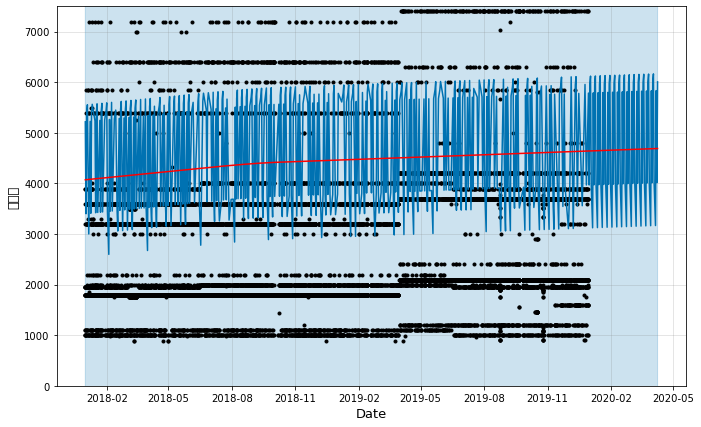

In [430]:
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
plt.xlabel('Date', fontsize=13)
plt.ylabel('매출액', fontsize=13)
plt.ylim([0,7500])

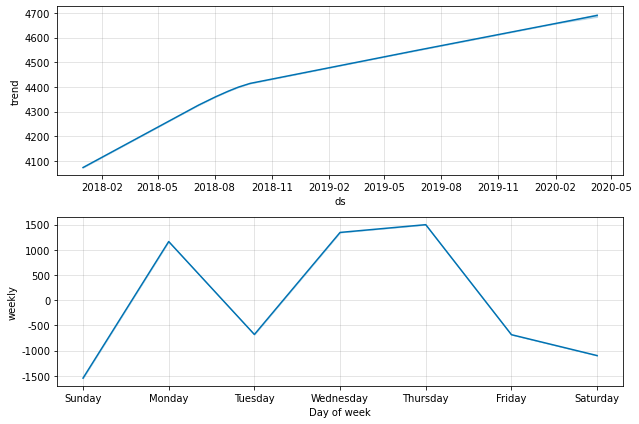

In [431]:
fig2 = m.plot_components(forecast)

# 트렌드와 계절성(주단위, 연단위)이 미치는 현황

In [72]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='200 days', period='50 days', horizon = '100 days')

INFO:fbprophet:Making 9 forecasts with cutoffs between 2018-08-17 00:00:00 and 2019-09-21 00:00:00


In [73]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-18,30209.116684,22385.119957,37395.179477,30700,2018-08-17
1,2018-08-20,31154.098422,23285.403584,39120.122186,30700,2018-08-17
2,2018-08-20,31154.098422,23100.626427,39098.098878,30700,2018-08-17
3,2018-08-20,31154.098422,23255.666332,38704.205498,30700,2018-08-17
4,2018-08-21,31489.926479,24022.447996,38771.392782,30700,2018-08-17


In [74]:
cutoffs = pd.to_datetime(['2018-09-15', '2018-10-15', '2018-11-04'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='100 days')

In [75]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,7.194104e+07,8481.806262,3100.480216,0.070521,0.038621,0.944794
1,10 days,6.261882e+07,7913.205161,2502.041310,0.054651,0.035556,0.958770
2,11 days,6.680866e+07,8173.656692,2604.783384,0.055311,0.035556,0.954717
3,12 days,6.046214e+07,7775.740382,2433.746714,0.053333,0.036028,0.962264
4,13 days,6.769185e+07,8227.505954,2711.208173,0.058487,0.038917,0.954282


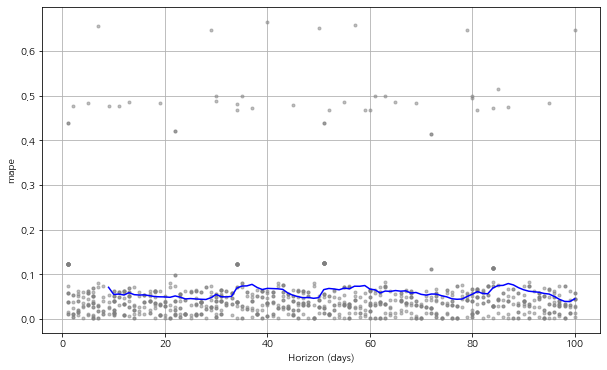

In [76]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


## 백미

In [22]:
baekmi_you = product['item_g_s'] == '백미'
baekmi = product[baekmi_you]
baekmi


,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt,year,month,season
62,C118291,C118291_20180925_142,제주매장,2018M09,화요일,17,2018-09-25,:0:17:39:14,2018-09-25,P01010104,주곡,멥쌀,백미,백미/유(4kg)-매장용,2,15700,31400,2018,9,가을
169,C118476,C118476_20180423_27,제주매장,2018M04,월요일,12,2018-04-23,:0:12:39:08,2018-04-23,P01010104,주곡,멥쌀,백미,백미/유(4kg)-매장용,1,15700,15700,2018,4,봄
240,C118477,C118477_20180115_117,제주매장,2018M01,월요일,17,2018-01-15,:0:17:06:45,2018-01-15,P01010104,주곡,멥쌀,백미,백미/유(4kg)-매장용,1,15700,15700,2018,1,겨울
256,C118477,C118477_20181101_142,제주매장,2018M11,목요일,18,2018-11-01,:0:18:14:53,2018-11-01,P01010104,주곡,멥쌀,백미,백미/유(4kg)-매장용,1,15700,15700,2018,11,가을
639,C119611,C119611_20180926_16,제주매장,2018M09,수요일,11,2018-09-26,:0:11:27:14,2018-09-26,P01010104,주곡,멥쌀,백미,백미/유(8kg)-매장용,1,30700,30700,2018,9,가을
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247534,C695316,C695316_20191025_256,제주매장,2019M10,금요일,16,2019-10-25,:0:16:56:00,2019-10-25,P01010104,주곡,멥쌀,백미,백미/유(8kg)-매장용,1,27630,27630,2019,10,가을
247566,C695733,C695733_20191219_23,제주매장,2019M12,목요일,11,2019-12-19,:0:11:38:24,2019-12-19,P01010104,주곡,멥쌀,백미,백미/유(4kg)-매장용,1,15700,15700,2019,12,겨울
247693,C699594,C699594_20191211_52,서귀포매장,2019M12,수요일,14,2019-12-11,:0:14:43:27,2019-12-11,P01010104,주곡,멥쌀,백미,백미/유(4kg)-매장용,2,15700,31400,2019,12,겨울
247721,C700358,C700358_20191122_107,제주매장,2019M11,금요일,16,2019-11-22,:0:16:35:02,2019-11-22,P01010106,주곡,멥쌀,백미,백미/유(2kg),1,8000,8000,2019,11,가을


In [23]:
baekmi_data = baekmi[['purchase_date','purchase_amt']]
baekmi_data

,purchase_date,purchase_amt
62,2018-09-25,31400
169,2018-04-23,15700
240,2018-01-15,15700
256,2018-11-01,15700
639,2018-09-26,30700
...,...,...
247534,2019-10-25,27630
247566,2019-12-19,15700
247693,2019-12-11,31400
247721,2019-11-22,8000


In [24]:
# baekmi=baekmi.loc[(baekmi['purchase_amt']<50000) & (baekmi['purchase_amt']>30000)]
# baekmi.shape

In [25]:
# baekmi=baekmi.loc[(baekmi['purchase_amt']<55000)]
# baekmi.shape

In [26]:
baekmi_data = baekmi[['purchase_date','purchase_amt']]
baekmi_data

,purchase_date,purchase_amt
62,2018-09-25,31400
169,2018-04-23,15700
240,2018-01-15,15700
256,2018-11-01,15700
639,2018-09-26,30700
...,...,...
247534,2019-10-25,27630
247566,2019-12-19,15700
247693,2019-12-11,31400
247721,2019-11-22,8000


In [27]:
baekmi_data.rename(columns = {'purchase_date' : 'ds'}, inplace = True)
baekmi_data.rename(columns = {'purchase_amt' : 'y'}, inplace = True)
baekmi_data

/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ds,y
62,2018-09-25,31400
169,2018-04-23,15700
240,2018-01-15,15700
256,2018-11-01,15700
639,2018-09-26,30700
...,...,...
247534,2019-10-25,27630
247566,2019-12-19,15700
247693,2019-12-11,31400
247721,2019-11-22,8000


In [28]:
m = Prophet() # Default growth='linear'
m.fit(baekmi_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future = m.make_future_dataframe(periods=100)
future.tail()

,ds
768,2020-04-04
769,2020-04-05
770,2020-04-06
771,2020-04-07
772,2020-04-08


In [30]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
768,2020-04-04,16076.851320,1538.112081,29297.325439,16019.166936,16136.879437,-822.546326,-822.546326,-822.546326,-822.546326,-822.546326,-822.546326,0.0,0.0,0.0,15254.304993
769,2020-04-05,16073.310989,3894.341877,29227.952152,16013.734933,16134.170043,-143.673411,-143.673411,-143.673411,-143.673411,-143.673411,-143.673411,0.0,0.0,0.0,15929.637578
770,2020-04-06,16069.770659,3462.757358,30663.471016,16008.500248,16131.490609,583.269443,583.269443,583.269443,583.269443,583.269443,583.269443,0.0,0.0,0.0,16653.040102
771,2020-04-07,16066.230329,936.260735,29484.439866,16004.085172,16129.340844,-662.568575,-662.568575,-662.568575,-662.568575,-662.568575,-662.568575,0.0,0.0,0.0,15403.661754
772,2020-04-08,16062.689999,3301.712491,30154.743120,15999.754037,16127.170586,536.588637,536.588637,536.588637,536.588637,536.588637,536.588637,0.0,0.0,0.0,16599.278636


In [31]:
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
713,2020-02-09,16127.896074,2009.336525,29598.949869
714,2020-02-10,16851.298598,2643.682117,30129.699510
715,2020-02-11,15601.920250,1923.906811,29810.418856
716,2020-02-12,16797.537132,2783.536680,30294.301065
717,2020-02-13,16508.511803,2890.662749,30614.193883
718,2020-02-14,16511.694428,3713.714694,29728.098864
719,2020-02-15,15427.781177,1617.632692,29574.053882
720,2020-02-16,16103.113762,2317.797484,29937.957395
721,2020-02-17,16826.516286,3453.258442,30486.258316
722,2020-02-18,15577.137938,1799.133196,29357.972551


(0.0, 40000.0)

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWar

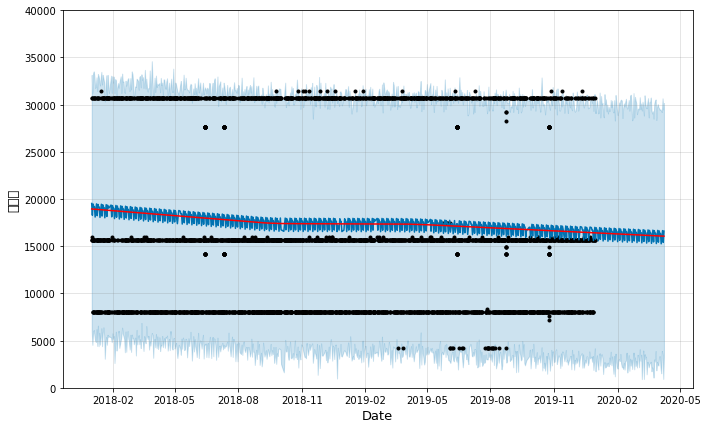

In [33]:
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
plt.xlabel('Date', fontsize=13)
plt.ylabel('매출액', fontsize=13)
plt.ylim([0,40000])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


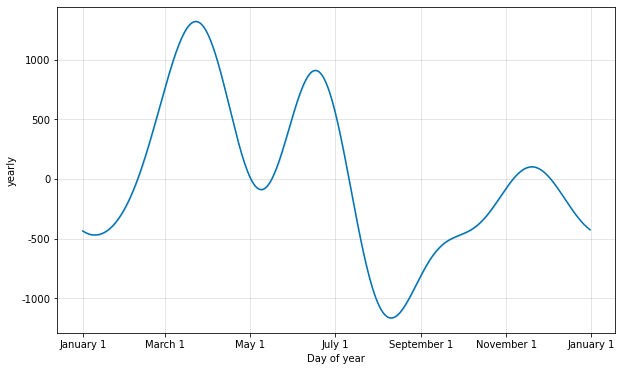

In [34]:
from fbprophet.plot import plot_yearly

m = Prophet(yearly_seasonality = 5).fit(baekmi_data)
a = plot_yearly(m)

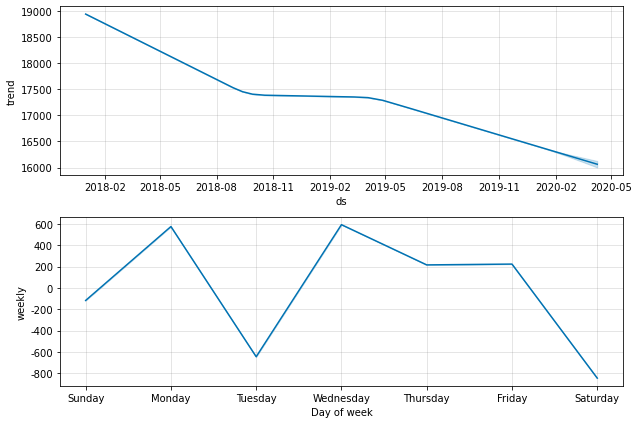

In [35]:
fig2 = m.plot_components(forecast)

In [83]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='200 days', period='50 days', horizon = '100 days')

INFO:fbprophet:Making 9 forecasts with cutoffs between 2018-08-17 00:00:00 and 2019-09-21 00:00:00


In [84]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-18,30209.116684,22355.658807,37742.773488,30700,2018-08-17
1,2018-08-20,31154.098422,23493.168928,39390.623166,30700,2018-08-17
2,2018-08-20,31154.098422,23262.301125,38905.607246,30700,2018-08-17
3,2018-08-20,31154.098422,23382.060529,39111.645413,30700,2018-08-17
4,2018-08-21,31489.926479,23995.742771,38870.988838,30700,2018-08-17


In [85]:
cutoffs = pd.to_datetime(['2018-09-15', '2018-10-15', '2018-11-04'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='100 days')

In [86]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,7.194104e+07,8481.806262,3100.480216,0.070521,0.038621,0.944794
1,10 days,6.261882e+07,7913.205161,2502.041310,0.054651,0.035556,0.958770
2,11 days,6.680866e+07,8173.656692,2604.783384,0.055311,0.035556,0.954717
3,12 days,6.046214e+07,7775.740382,2433.746714,0.053333,0.036028,0.962264
4,13 days,6.769185e+07,8227.505954,2711.208173,0.058487,0.038917,0.954282


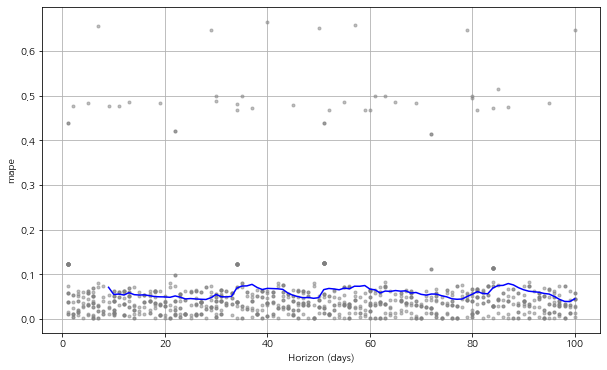

In [87]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

## 조아농장 토종유정란(10알) -제주     (스낵 대신에 item중에 토종유정란으로 분석!!)

In [436]:
joatojong_you = product['item_name'] == '조아농장 토종유정란(10알) -제주'
joatojong = product[joatojong_you]
joatojong

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt,year,month,season
67,C118291,C118291_20181002_8,제주매장,2018M10,화요일,10,2018-10-02,:0:10:12:55,2018-10-02,P06020114,축산물,유정란,토종유정란,조아농장 토종유정란(10알) -제주,3,6400,19200,2018,10,가을
130,C118298,C118298_20180621_132,서귀포매장,2018M06,목요일,19,2018-06-21,:0:19:19:20,2018-06-21,P06020114,축산물,유정란,토종유정란,조아농장 토종유정란(10알) -제주,1,5400,5400,2018,6,여름
304,C118530,C118530_20180630_86,제주매장,2018M06,토요일,17,2018-06-30,:0:17:36:00,2018-06-30,P06020114,축산물,유정란,토종유정란,조아농장 토종유정란(10알) -제주,1,6400,6400,2018,6,여름
306,C118530,C118530_20180713_128,제주매장,2018M07,금요일,17,2018-07-13,:0:17:42:14,2018-07-13,P06020114,축산물,유정란,토종유정란,조아농장 토종유정란(10알) -제주,2,6400,12800,2018,7,여름
314,C118530,C118530_20181011_80,서귀포매장,2018M10,목요일,14,2018-10-11,:0:14:29:36,2018-10-11,P06020114,축산물,유정란,토종유정란,조아농장 토종유정란(10알) -제주,1,6400,6400,2018,10,가을
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246524,C685937,C685937_20190927_129,서귀포매장,2019M09,금요일,16,2019-09-27,:0:16:33:05,2019-09-27,P06020114,축산물,유정란,토종유정란,조아농장 토종유정란(10알) -제주,1,6400,6400,2019,9,가을
246527,C685937,C685937_20191011_112,서귀포매장,2019M10,금요일,15,2019-10-11,:0:15:28:47,2019-10-11,P06020114,축산물,유정란,토종유정란,조아농장 토종유정란(10알) -제주,1,6400,6400,2019,10,가을
247200,C693416,C693416_20191025_238,제주매장,2019M10,금요일,16,2019-10-25,:0:16:35:16,2019-10-25,P06020114,축산물,유정란,토종유정란,조아농장 토종유정란(10알) -제주,1,6400,6400,2019,10,가을
247367,C694221,C694221_20191114_63,제주매장,2019M11,목요일,14,2019-11-14,:0:14:14:59,2019-11-14,P06020114,축산물,유정란,토종유정란,조아농장 토종유정란(10알) -제주,1,6400,6400,2019,11,가을


In [437]:
joatojong=joatojong.loc[(joatojong['purchase_amt']< 25000)]
joatojong.shape

(3506, 20)

In [438]:
joatojong_data = joatojong[['purchase_date','purchase_amt']]
joatojong_data

,purchase_date,purchase_amt
67,2018-10-02,19200
130,2018-06-21,5400
304,2018-06-30,6400
306,2018-07-13,12800
314,2018-10-11,6400
...,...,...
246524,2019-09-27,6400
246527,2019-10-11,6400
247200,2019-10-25,6400
247367,2019-11-14,6400


In [439]:
joatojong_data.rename(columns = {'purchase_date' : 'ds'}, inplace = True)
joatojong_data.rename(columns = {'purchase_amt' : 'y'}, inplace = True)
joatojong_data

/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ds,y
67,2018-10-02,19200
130,2018-06-21,5400
304,2018-06-30,6400
306,2018-07-13,12800
314,2018-10-11,6400
...,...,...
246524,2019-09-27,6400
246527,2019-10-11,6400
247200,2019-10-25,6400
247367,2019-11-14,6400


In [440]:
m = Prophet(yearly_seasonality=10) # Default growth='linear'
m.fit(joatojong_data)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [441]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
585,2020-03-25
586,2020-03-26
587,2020-03-27
588,2020-03-28
589,2020-03-29


In [442]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
585,2020-03-25,7168.432239,3869.010755,10749.772322,7137.388207,7195.074402,54.332346,54.332346,54.332346,-130.878252,-130.878252,-130.878252,185.210599,185.210599,185.210599,0.0,0.0,0.0,7222.764586
586,2020-03-26,7166.799492,4029.727852,10692.282861,7134.870262,7193.836125,225.390052,225.390052,225.390052,26.670866,26.670866,26.670866,198.719186,198.719186,198.719186,0.0,0.0,0.0,7392.189544
587,2020-03-27,7165.166745,3991.246513,10702.192197,7132.472501,7192.935770,185.292877,185.292877,185.292877,-23.344958,-23.344958,-23.344958,208.637835,208.637835,208.637835,0.0,0.0,0.0,7350.459622
588,2020-03-28,7163.533997,4080.227088,10521.867874,7130.338708,7191.803665,158.259005,158.259005,158.259005,-56.301437,-56.301437,-56.301437,214.560443,214.560443,214.560443,0.0,0.0,0.0,7321.793002
589,2020-03-29,7161.901250,4478.288604,10961.814378,7128.240726,7190.758383,588.436753,588.436753,588.436753,372.259771,372.259771,372.259771,216.176981,216.176981,216.176981,0.0,0.0,0.0,7750.338002


In [443]:
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
530,2020-01-30,6866.911760,3826.721691,10259.653821
531,2020-01-31,6800.689146,3385.090154,10104.583654
532,2020-02-01,6751.913670,3358.383280,10104.708154
533,2020-02-02,7165.809417,4167.254902,10676.675135
534,2020-02-03,6677.474014,3090.056581,9872.417689
535,2020-02-04,6685.304831,3144.984024,9901.321221
536,2020-02-05,6632.280766,3483.264869,9864.311305
537,2020-02-06,6786.006083,3587.913404,10136.686659
538,2020-02-07,6735.926035,3253.562587,10048.962050
539,2020-02-08,6706.841538,3515.935650,9902.491768


In [444]:
m = Prophet(yearly_seasonality=5, changepoint_prior_scale=0.000005, interval_width=0.95) # Default growth='linear'
m.fit(joatojong_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(5000.0, 10000.0)

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWar

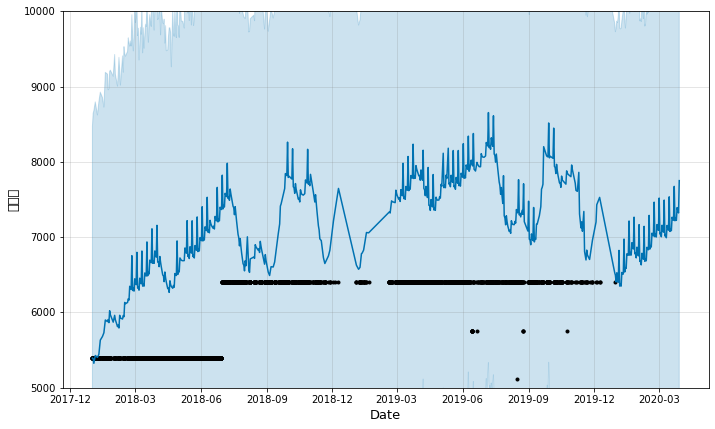

In [451]:
fig1 = m.plot(forecast)
# a = add_changepoints_to_plot(fig1.gca(), m, forecast)
plt.xlabel('Date', fontsize=13)
plt.ylabel('매출액', fontsize=13)
plt.ylim([5000,10000])

Text(47.125, 0.5, '매출액')

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWar

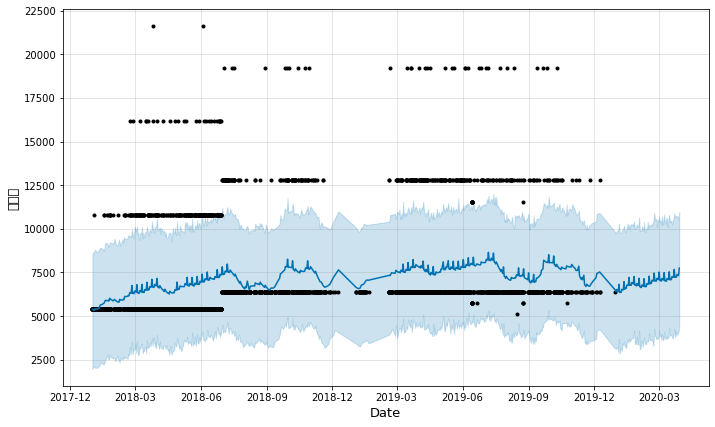

In [452]:
fig1 = m.plot(forecast)
# a = add_changepoints_to_plot(fig1.gca(), m, forecast)
plt.xlabel('Date', fontsize=13)
plt.ylabel('매출액', fontsize=13)


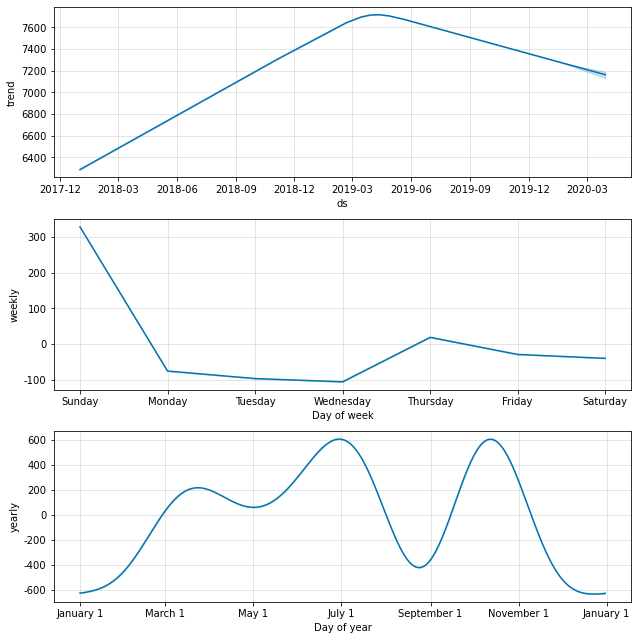

In [453]:
fig2 = m.plot_components(forecast)


In [61]:
## 모델링 파라미터 개선을 통해 모델의 정확도 올린다.
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='200 days', period='50 days', horizon = '100 days')

INFO:fbprophet:Making 9 forecasts with cutoffs between 2018-08-17 00:00:00 and 2019-09-21 00:00:00


In [68]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-20,8257.493405,3295.313517,13306.420366,6400,2018-08-17
1,2018-08-21,8565.935587,3829.024470,13699.390104,6400,2018-08-17
2,2018-08-22,9044.465861,4211.426555,14063.635644,6400,2018-08-17
3,2018-08-22,9044.465861,4211.165862,14056.359253,6400,2018-08-17
4,2018-08-22,9044.465861,3996.198126,13717.572469,6400,2018-08-17


In [69]:
cutoffs = pd.to_datetime(['2018-09-15', '2018-10-15', '2018-11-04'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='100 days')

In [98]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,7.194104e+07,8481.806262,3100.480216,0.070521,0.038621,0.944794
1,10 days,6.261882e+07,7913.205161,2502.041310,0.054651,0.035556,0.958770
2,11 days,6.680866e+07,8173.656692,2604.783384,0.055311,0.035556,0.954717
3,12 days,6.046214e+07,7775.740382,2433.746714,0.053333,0.036028,0.962264
4,13 days,6.769185e+07,8227.505954,2711.208173,0.058487,0.038917,0.954282
...,...,...,...,...,...,...,...
87,96 days,2.803707e+07,5295.004692,1967.251436,0.049936,0.039825,0.970840
88,97 days,1.786562e+07,4226.773966,1613.961949,0.043545,0.033696,0.981132
89,98 days,9.867886e+06,3141.319162,1335.476571,0.038949,0.033080,0.990566
90,99 days,9.815971e+06,3133.044927,1324.377051,0.038588,0.033050,0.990566


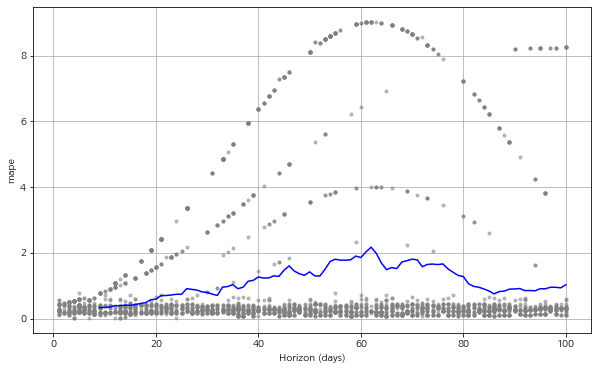

In [71]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


## 계절 변동 상품 프로펫 분석

# 한과/유과 소분류 프로펫 분석

In [37]:
product

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt,year,month,season
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000,2018,1,겨울
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900,2018,1,겨울
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600,2018,1,겨울
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400,2018,10,가을
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000,2018,10,가을
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247839,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,:0:14:52:43,2019-12-22,P01010104,주곡,멥쌀,백미,백미/유(4kg)-매장용,1,15700,15700,2019,12,겨울
247840,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,:0:14:52:43,2019-12-22,P08010301,간식,과자,한과/유과,차례상약과(350g/10개),1,8800,8800,2019,12,겨울
247841,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,:0:14:52:43,2019-12-22,P06040300,축산물,유제품,아이스크림,유기농아이스크림(기본형),1,8900,8900,2019,12,겨울
247842,C705016,C705016_20191229_51,서귀포매장,2019M12,일요일,14,2019-12-29,:0:14:53:30,2019-12-29,P08040137,간식,빵,빵,쌀로만든잉글리쉬머핀(66g×4개)/매장,1,3900,3900,2019,12,겨울


In [38]:
hangua_you=product[(product["item_g_s"] == '한과/유과')]
hangua_you

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt,year,month,season
12,C118291,C118291_20180210_30,제주매장,2018M02,토요일,13,2018-02-10,:0:13:24:36,2018-02-10,P08010302,간식,과자,한과/유과,한과모음3(1.2kg),1,39000,39000,2018,2,겨울
249,C118477,C118477_20180619_119,제주매장,2018M06,화요일,17,2018-06-19,:0:17:05:00,2018-06-19,P08010300,간식,과자,한과/유과,약과(200g/18개),3,4400,13200,2018,6,여름
335,C118590,C118590_20180329_91,제주매장,2018M03,목요일,17,2018-03-29,:0:17:23:24,2018-03-29,P08010302,간식,과자,한과/유과,찹쌀유과(120g),1,3400,3400,2018,3,봄
345,C118590,C118590_20180419_5,제주매장,2018M04,목요일,10,2018-04-19,:0:10:27:13,2018-04-19,P08010302,간식,과자,한과/유과,찹쌀유과(120g),2,3400,6800,2018,4,봄
351,C118590,C118590_20180528_133,제주매장,2018M05,월요일,18,2018-05-28,:0:18:32:44,2018-05-28,P08010302,간식,과자,한과/유과,방울유과(70g),2,2800,5600,2018,5,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246695,C688507,C688507_20191119_172,제주매장,2019M11,화요일,19,2019-11-19,:0:19:26:45,2019-11-19,P08010302,간식,과자,한과/유과,찹쌀유과(120g),1,3600,3600,2019,11,가을
247169,C692677,C692677_20191203_23,제주매장,2019M12,화요일,11,2019-12-03,:0:11:45:52,2019-12-03,P08010300,간식,과자,한과/유과,약과(200g/18개),1,4600,4600,2019,12,겨울
247652,C697951,C697951_20191221_100,제주매장,2019M12,토요일,16,2019-12-21,:0:16:31:19,2019-12-21,P08010301,간식,과자,한과/유과,차례상약과(350g/10개),1,8800,8800,2019,12,겨울
247760,C701622,C701622_20191205_61,제주매장,2019M12,목요일,14,2019-12-05,:0:14:38:47,2019-12-05,P08010301,간식,과자,한과/유과,차례상약과(350g/10개),1,8800,8800,2019,12,겨울


In [459]:
# kimjang_chae=kimjang_chae.loc[(kimjang_chae['purchase_amt']< 40000)]
# kimjang_chae.shape

In [39]:
hangua_you_data = hangua_you[['purchase_date','purchase_amt']]
hangua_you_data

,purchase_date,purchase_amt
12,2018-02-10,39000
249,2018-06-19,13200
335,2018-03-29,3400
345,2018-04-19,6800
351,2018-05-28,5600
...,...,...
246695,2019-11-19,3600
247169,2019-12-03,4600
247652,2019-12-21,8800
247760,2019-12-05,8800


In [40]:
hangua_you_data.rename(columns = {'purchase_date' : 'ds'}, inplace = True)
hangua_you_data.rename(columns = {'purchase_amt' : 'y'}, inplace = True)
hangua_you_data

/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ds,y
12,2018-02-10,39000
249,2018-06-19,13200
335,2018-03-29,3400
345,2018-04-19,6800
351,2018-05-28,5600
...,...,...
246695,2019-11-19,3600
247169,2019-12-03,4600
247652,2019-12-21,8800
247760,2019-12-05,8800


In [41]:
m = Prophet(seasonality_prior_scale=1000) # Default growth='linear'
m.fit(hangua_you_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
future = m.make_future_dataframe(periods=100)
future.tail()

,ds
659,2020-04-04
660,2020-04-05
661,2020-04-06
662,2020-04-07
663,2020-04-08


In [43]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
659,2020-04-04,8457.788428,-9332.896985,23213.500360,7748.769820,9175.680669,-1297.353718,-1297.353718,-1297.353718,-1297.353718,-1297.353718,-1297.353718,0.0,0.0,0.0,7160.434711
660,2020-04-05,8458.615287,-9966.592021,23148.906794,7738.930600,9188.249134,-1500.586556,-1500.586556,-1500.586556,-1500.586556,-1500.586556,-1500.586556,0.0,0.0,0.0,6958.028731
661,2020-04-06,8459.442146,-9270.251280,22831.753138,7721.112961,9201.039504,-427.836376,-427.836376,-427.836376,-427.836376,-427.836376,-427.836376,0.0,0.0,0.0,8031.605770
662,2020-04-07,8460.269005,-6859.451288,24976.826517,7701.515944,9220.676327,971.537281,971.537281,971.537281,971.537281,971.537281,971.537281,0.0,0.0,0.0,9431.806287
663,2020-04-08,8461.095864,-6830.967313,26011.294044,7686.348183,9235.598339,1172.902200,1172.902200,1172.902200,1172.902200,1172.902200,1172.902200,0.0,0.0,0.0,9633.998064


In [44]:
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
654,2020-03-30,8025.817757,-7547.501255,25290.666518
655,2020-03-31,9426.018274,-6133.245098,25539.401632
656,2020-04-01,9628.210051,-5843.037782,27179.298203
657,2020-04-02,8548.413058,-8767.006670,24696.294763
658,2020-04-03,9446.020391,-6647.702651,25674.001427
659,2020-04-04,7160.434711,-9332.896985,23213.500360
660,2020-04-05,6958.028731,-9966.592021,23148.906794
661,2020-04-06,8031.605770,-9270.251280,22831.753138
662,2020-04-07,9431.806287,-6859.451288,24976.826517
663,2020-04-08,9633.998064,-6830.967313,26011.294044


(0.0, 40000.0)

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWar

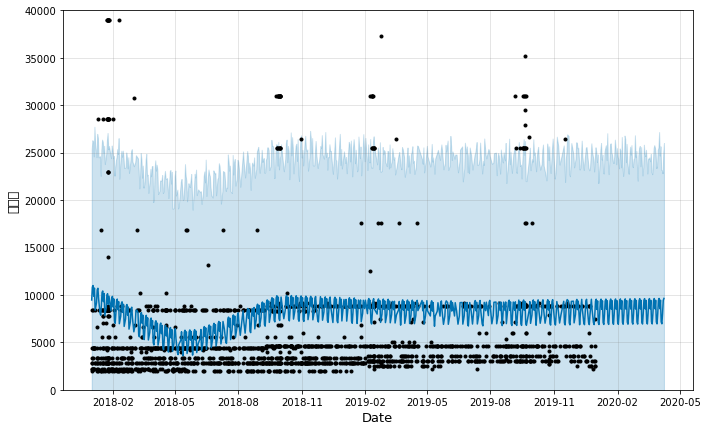

In [45]:
fig1 = m.plot(forecast)
# a = add_changepoints_to_plot(fig1.gca(), m, forecast)
plt.xlabel('Date', fontsize=13)
plt.ylabel('매출액', fontsize=13)
plt.ylim([0,40000])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


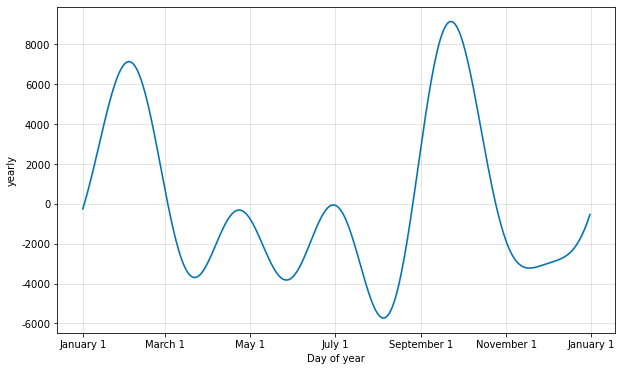

In [47]:
from fbprophet.plot import plot_yearly

m = Prophet(yearly_seasonality = 5).fit(hangua_you_data)
a = plot_yearly(m)

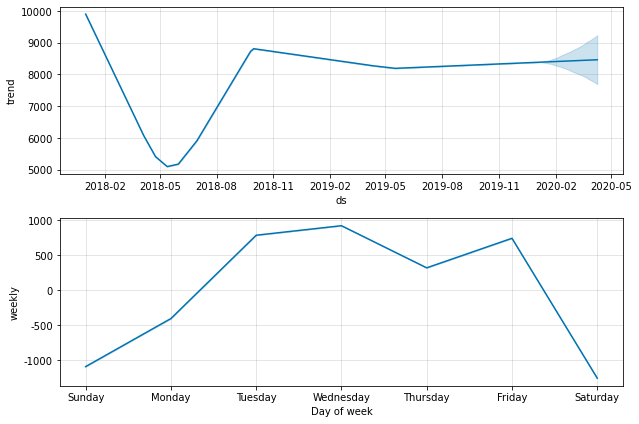

In [50]:
fig2 = m.plot_components(forecast)
# 트렌드와 계절성(주단위, 연단위)이 미치는 현황